In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
data = pd.read_csv('GOOGL.csv')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

In [ ]:
split_ratio = 0.8
split_index = int(split_ratio * len(data))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
111/111 [==============================] - 16s 144ms/step - loss: 2.4921e-04
Epoch 2/5
111/111 [==============================] - 16s 144ms/step - loss: 2.5122e-04
Epoch 3/5
111/111 [==============================] - 17s 156ms/step - loss: 2.6940e-04
Epoch 4/5
111/111 [==============================] - 16s 144ms/step - loss: 2.2238e-04
Epoch 5/5
111/111 [==============================] - 16s 144ms/step - loss: 2.2616e-04


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

25/25 [==============================] - 3s 63ms/step - loss: 0.0036
Test Loss: 0.0036230850964784622


In [ ]:
predictions = model.predict(X_test)

25/25 [==============================] - 2s 45ms/step


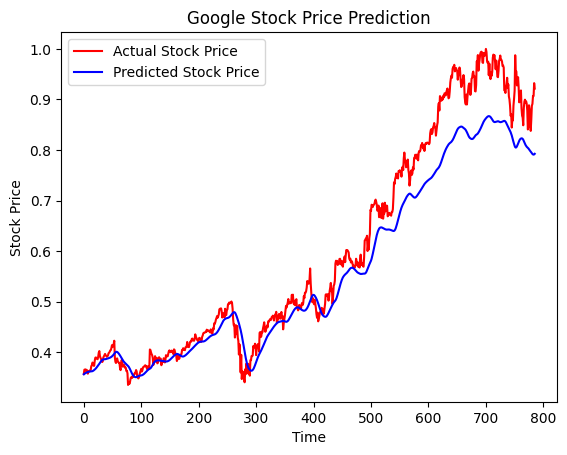

In [ ]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()